For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

```bash
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
  The label on the x axis should be Date and the label on the y axis should be Page Views.
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year.
  The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time.
   The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
```

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [22]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [21]:
df2= df.isnull().sum()
df2

,0
value,0


In [23]:
df.set_index('date', inplace=True)
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [115]:
# filterring the data by dropping out page views with less than 2.5% or above 97.5%
df_fil= df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]
df_fil

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
  The label on the x axis should be Date and the label on the y axis should be Page Views.

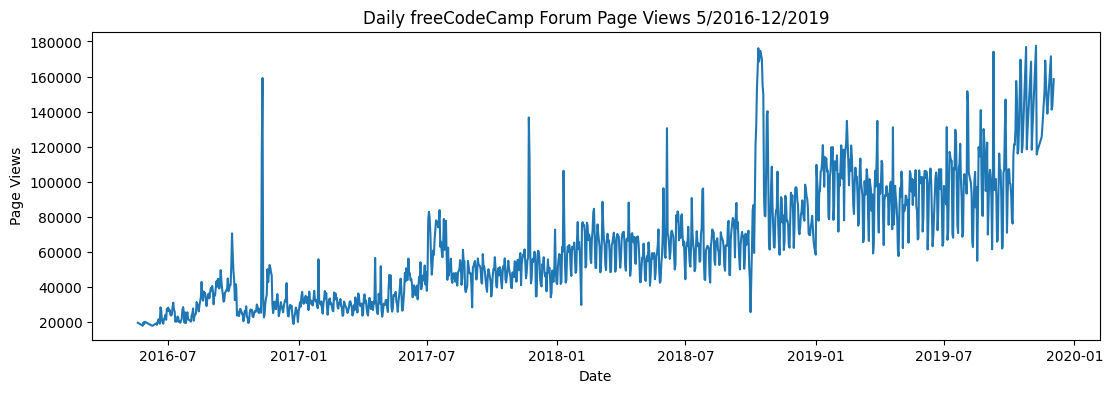

In [58]:
#function to draw line plot for the page view of the fcc forum (2016 to 2019) per day
def draw_line_plot():
  plt.figure(figsize=(13,4))
  plt.plot(df_fil.index, df_fil['value'])
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  plt.show()


draw_line_plot()

- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year.
  The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

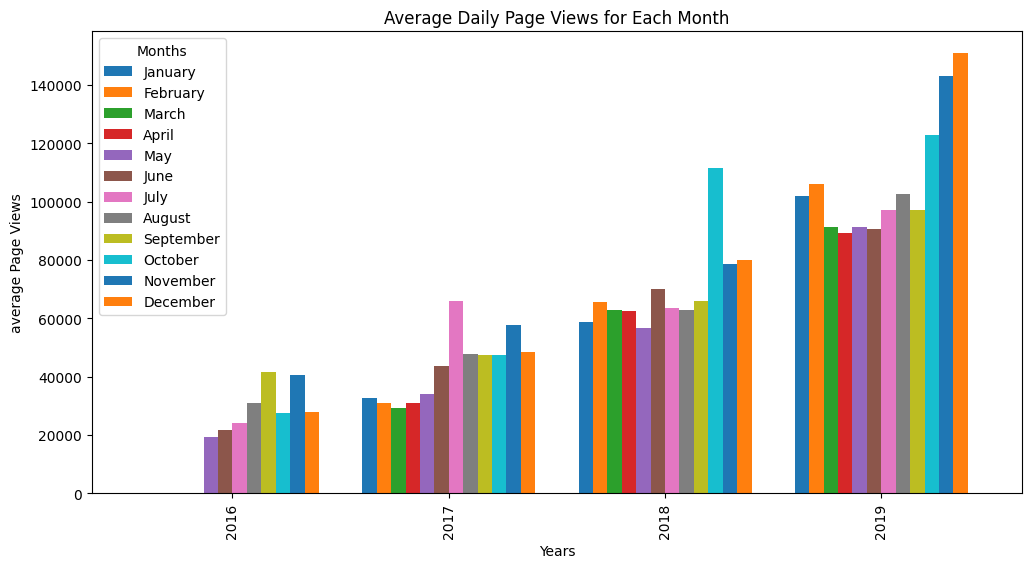

In [75]:
# function to draw bar plot for the average daily page views of fcc forum for each month
def draw_bar_plot():
  df_fil.loc[:, 'Year'] = df_fil.index.year # creates a Year column in the df_fil DataFrame & extracts the year and appends it to that column
  df_fil.loc[:, 'Month'] = df_fil.index.month # creates a Month column in the df_fil DataFrame & extracts the month
  df_fil_avg = df_fil.groupby(["Year", 'Month'])['value'].mean().unstack() # creates the DataFrame grouped by month and year & calculates the average of the value(page view) for each month
  df_fil_avg.plot(kind='bar', figsize=(12, 6), width=0.8)
  plt.title('Average Daily Page Views for Each Month')
  plt.xlabel('Years')
  plt.ylabel('average Page Views')
  plt.legend(title = 'Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
  plt.show()

draw_bar_plot()

- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time.
   The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

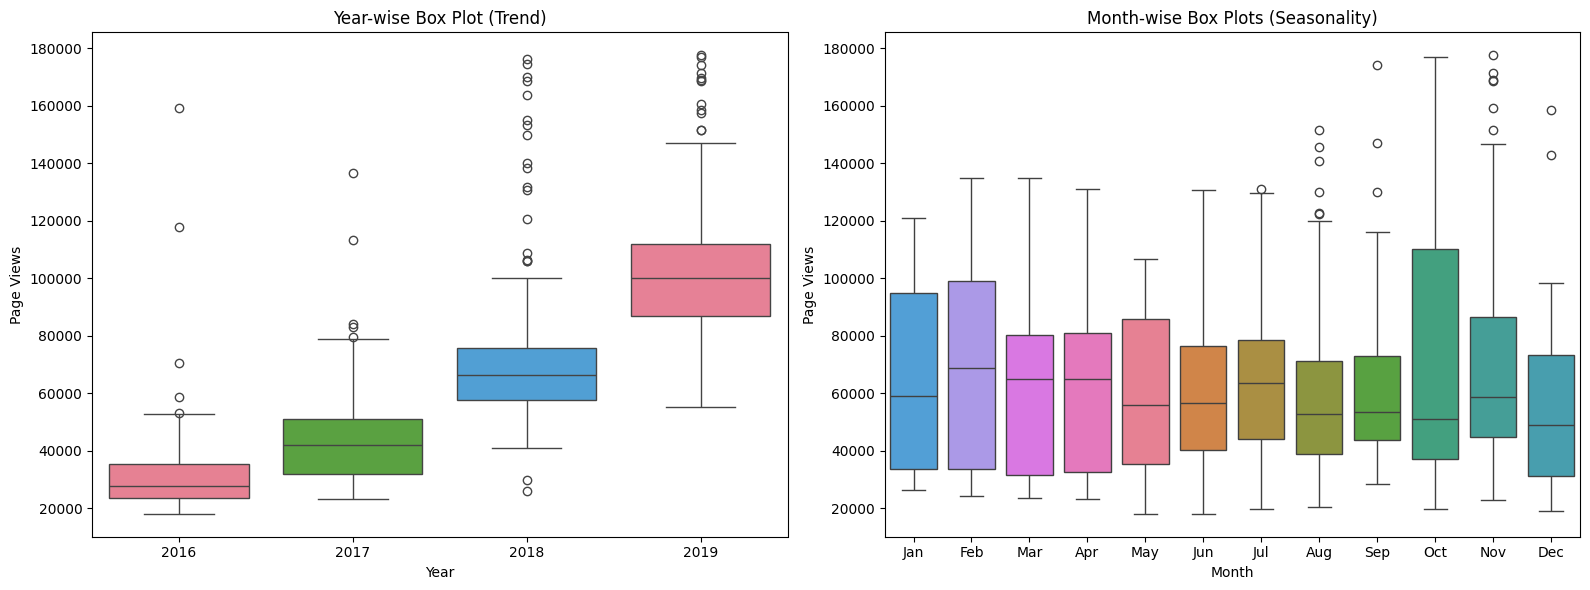

In [114]:
# function to draw box plots for the year and month of the page-views for fcc forum
def draw_box_plot():
  df_box = df_fil.copy()
  df_box.reset_index(inplace=True)
  df_box['Year'] = df_box['date'].dt.year # extracts the year and appends to the Year column
  df_box['Month'] = df_box['date'].dt.strftime('%b') # extracts the month and appends to the Month column
  month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # sets the month order for the second plot
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6)) # setting subplots
  sns.boxplot(x = 'Year', y = 'value', ax = ax1, hue = 'Year', data=df_box, palette= 'husl') # first plot
  ax1.set_title('Year-wise Box Plot (Trend)')
  ax1.set_xlabel('Year')
  ax1.set_ylabel('Page Views')
  ax1.legend_.set_visible(False) # hides the legend
  sns.boxplot(x = 'Month', y= 'value', ax= ax2, hue = 'Month', data =df_box, palette= 'husl', order = month_order) # second plot
  ax2.set_title('Month-wise Box Plots (Seasonality)')
  ax2.set_xlabel('Month')
  ax2.set_ylabel('Page Views')
  ax1.legend_.set_visible(False)
  plt.tight_layout()
  plt.show()

draw_box_plot()